<a href="https://colab.research.google.com/github/DiegoALara/GAN-first-try/blob/main/GAN_NTEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from tensorflow.keras import initializers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization, Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Database

In [ ]:
#datos
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


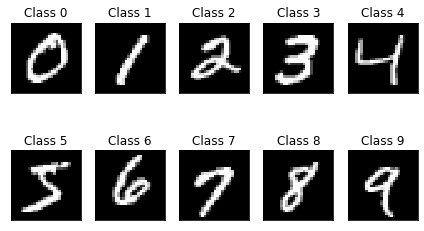

In [ ]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [ ]:
print('X_train.shape', X_train.shape)

# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)

# normalizing the inputs (-1, 1)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train.shape (60000, 28, 28)
X_train reshape: (60000, 784)


# Generator Model

In [ ]:
#generator
# latent space dimension
latent_dim = 100

# imagem dimension 28x28
img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 2
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 3
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Output layer 
generator.add(Dense(img_dim, activation='tanh'))


In [ ]:
# prints a summary representation of your model
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

# Discriminator Model

In [ ]:
#discriminator
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

In [ ]:
# prints a summary representation of your model
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#compile discriminator
# Optimizer
optimizer = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# GAN

In [ ]:
#gan combined network
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
# prints a summary representation of your model
d_g.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 784)               583312    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 265601    
                                                                 
Total params: 848,913
Trainable params: 581,520
Non-trainable params: 267,393
_________________________________________________________________


# Training

epoch = 1/100, d_loss=0.757, g_loss=1.589                                                                                                     


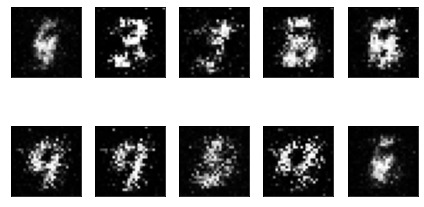

epoch = 2/100, d_loss=0.568, g_loss=1.704                                                                                                     
epoch = 3/100, d_loss=0.679, g_loss=1.365                                                                                                     
epoch = 4/100, d_loss=0.574, g_loss=1.234                                                                                                     
epoch = 5/100, d_loss=0.598, g_loss=1.384                                                                                                     
epoch = 6/100, d_loss=0.632, g_loss=1.245                                                                                                     
epoch = 7/100, d_loss=0.628, g_loss=1.174                                                                                                     
epoch = 8/100, d_loss=0.578, g_loss=1.193                                                                                                     

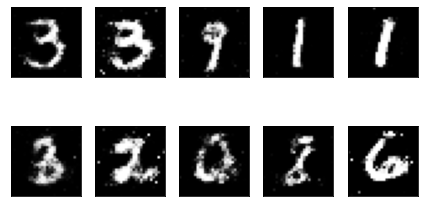

epoch = 12/100, d_loss=0.648, g_loss=1.010                                                                                                     
epoch = 13/100, d_loss=0.600, g_loss=1.093                                                                                                     
epoch = 14/100, d_loss=0.570, g_loss=1.069                                                                                                     
epoch = 15/100, d_loss=0.619, g_loss=1.053                                                                                                     
epoch = 16/100, d_loss=0.615, g_loss=1.087                                                                                                     
epoch = 17/100, d_loss=0.607, g_loss=1.085                                                                                                     
epoch = 18/100, d_loss=0.608, g_loss=1.047                                                                                              

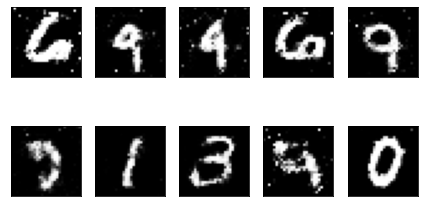

epoch = 22/100, d_loss=0.556, g_loss=1.142                                                                                                     
epoch = 23/100, d_loss=0.590, g_loss=1.134                                                                                                     
epoch = 24/100, d_loss=0.539, g_loss=1.174                                                                                                     
epoch = 25/100, d_loss=0.580, g_loss=1.111                                                                                                     
epoch = 26/100, d_loss=0.556, g_loss=1.102                                                                                                     
epoch = 27/100, d_loss=0.573, g_loss=1.121                                                                                                     
epoch = 28/100, d_loss=0.594, g_loss=1.138                                                                                              

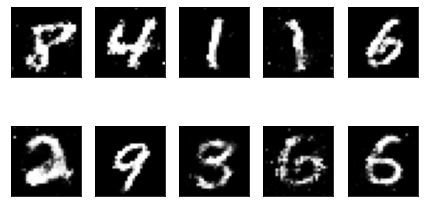

epoch = 32/100, d_loss=0.587, g_loss=1.163                                                                                                     
epoch = 33/100, d_loss=0.543, g_loss=1.286                                                                                                     
epoch = 34/100, d_loss=0.561, g_loss=1.176                                                                                                     
epoch = 35/100, d_loss=0.563, g_loss=1.175                                                                                                     
epoch = 36/100, d_loss=0.563, g_loss=1.161                                                                                                     
epoch = 37/100, d_loss=0.547, g_loss=1.204                                                                                                     
epoch = 38/100, d_loss=0.593, g_loss=1.128                                                                                              

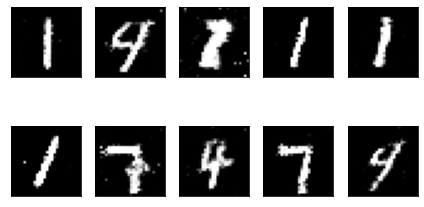

epoch = 42/100, d_loss=0.546, g_loss=1.214                                                                                                     
epoch = 43/100, d_loss=0.505, g_loss=1.282                                                                                                     
epoch = 44/100, d_loss=0.552, g_loss=1.238                                                                                                     
epoch = 45/100, d_loss=0.552, g_loss=1.188                                                                                                     
epoch = 46/100, d_loss=0.551, g_loss=1.209                                                                                                     
epoch = 47/100, d_loss=0.542, g_loss=1.257                                                                                                     
epoch = 48/100, d_loss=0.540, g_loss=1.327                                                                                              

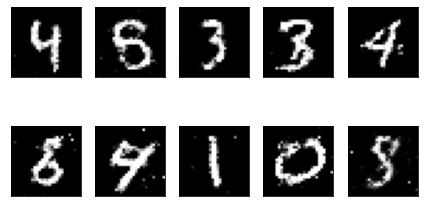

epoch = 52/100, d_loss=0.539, g_loss=1.279                                                                                                     
epoch = 53/100, d_loss=0.506, g_loss=1.373                                                                                                     
epoch = 54/100, d_loss=0.569, g_loss=1.297                                                                                                     
epoch = 55/100, d_loss=0.541, g_loss=1.364                                                                                                     
epoch = 56/100, d_loss=0.497, g_loss=1.267                                                                                                     
epoch = 57/100, d_loss=0.593, g_loss=1.255                                                                                                     
epoch = 58/100, d_loss=0.570, g_loss=1.196                                                                                              

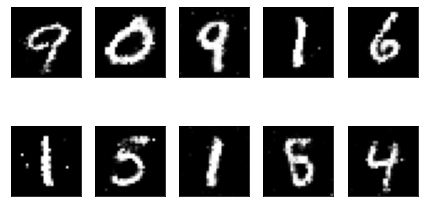

epoch = 62/100, d_loss=0.579, g_loss=1.275                                                                                                     
epoch = 63/100, d_loss=0.568, g_loss=1.367                                                                                                     
epoch = 64/100, d_loss=0.530, g_loss=1.423                                                                                                     
epoch = 65/100, d_loss=0.491, g_loss=1.379                                                                                                     
epoch = 66/100, d_loss=0.567, g_loss=1.268                                                                                                     
epoch = 67/100, d_loss=0.593, g_loss=1.438                                                                                                     
epoch = 68/100, d_loss=0.522, g_loss=1.361                                                                                              

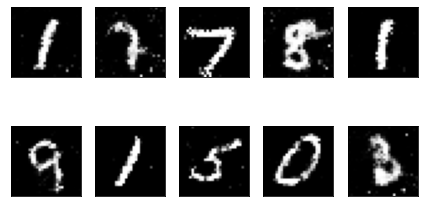

epoch = 72/100, d_loss=0.541, g_loss=1.421                                                                                                     
epoch = 73/100, d_loss=0.503, g_loss=1.422                                                                                                     
epoch = 74/100, d_loss=0.519, g_loss=1.460                                                                                                     
epoch = 75/100, d_loss=0.528, g_loss=1.495                                                                                                     
epoch = 76/100, d_loss=0.533, g_loss=1.437                                                                                                     
epoch = 77/100, d_loss=0.558, g_loss=1.401                                                                                                     
epoch = 78/100, d_loss=0.533, g_loss=1.416                                                                                              

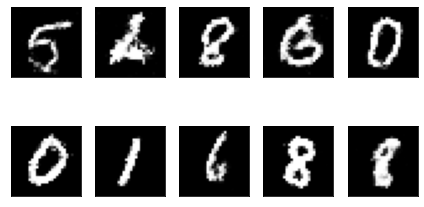

epoch = 82/100, d_loss=0.524, g_loss=1.521                                                                                                     
epoch = 83/100, d_loss=0.494, g_loss=1.381                                                                                                     
epoch = 84/100, d_loss=0.581, g_loss=1.424                                                                                                     
epoch = 85/100, d_loss=0.509, g_loss=1.350                                                                                                     
epoch = 86/100, d_loss=0.526, g_loss=1.382                                                                                                     
epoch = 87/100, d_loss=0.503, g_loss=1.629                                                                                                     
epoch = 88/100, d_loss=0.535, g_loss=1.296                                                                                              

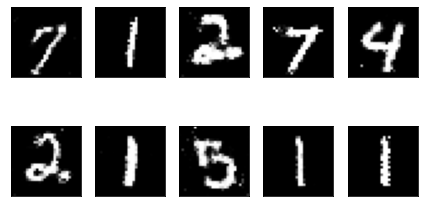

epoch = 92/100, d_loss=0.482, g_loss=1.561                                                                                                     
epoch = 93/100, d_loss=0.540, g_loss=1.479                                                                                                     
epoch = 94/100, d_loss=0.534, g_loss=1.509                                                                                                     
epoch = 95/100, d_loss=0.475, g_loss=1.622                                                                                                     
epoch = 96/100, d_loss=0.501, g_loss=1.470                                                                                                     
epoch = 97/100, d_loss=0.499, g_loss=1.497                                                                                                     
epoch = 98/100, d_loss=0.499, g_loss=1.477                                                                                              

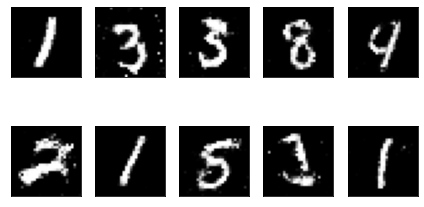

In [ ]:
#fit model
epochs = 100
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):

        # Train Discriminator weights
        discriminator.trainable = True

        # Real samples
        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        d_loss_real = discriminator.train_on_batch(
            x=X_batch, y=real * (1 - smooth)
        )

        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)

        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        # Train Generator weights
        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)

        print(
            "epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f"
            % (
                e + 1,
                epochs,
                i,
                len(X_train) // batch_size,
                d_loss_batch,
                d_g_loss_batch[0],
            ),
            100 * " ",
            end="\r",
        )

    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print(
        "epoch = %d/%d, d_loss=%.3f, g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], d_g_loss[-1]),
        100 * " ",
    )

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(
            np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
        )

        for k in range(samples):
            plt.subplot(2, 5, k + 1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap="gray")
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

# Metrics

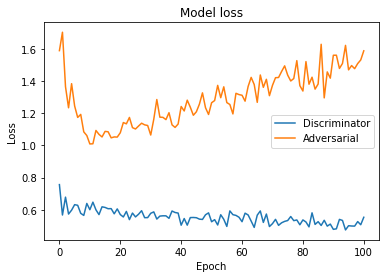

In [ ]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()

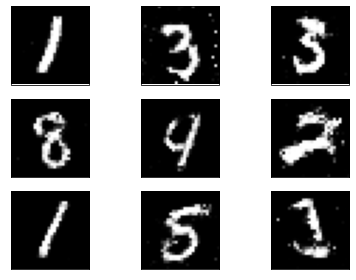

In [ ]:
from matplotlib import pyplot
for i in range(9): 
  #plt.subplot(3, 3, i+1) 
  plt.subplot(3,3 , i+1)
  plt.imshow(x_fake[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  plt.xticks([])
  plt.yticks([])
  #plt.show()
plt.tight_layout()